In [2]:
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [19]:
##Encoder
x=torch.load("dataflow/data.pt") #torch.Size([1, 1, 40003])
x_conv1d=torch.load("dataflow/data_conv1d.pt") #torch.Size([1, 256, 40002])
x_conv1d_relu=torch.load("dataflow/data_conv1d_relu.pt") #torch.Size([1, 256, 40002])

In [4]:
##Seperator

In [5]:
 # Norm + Linear

#before layer normalization the data is permuted to(0,2,1)
xnorm=torch.load("dataflow/dcr_norm.pt")#torch.Size([1, 40002, 256])
#before linear layer the data is permuted to(0,2,1)
xnorm_linear=torch.load("dataflow/dcr_norm_linear.pt")#torch.Size([1, 256, 40002])

In [6]:
##chunking
#padding (rest=123) as data is 40002 need to make 40125 and then the data is padded to 40375 which is 125+40125+125
xpad=torch.load("dataflow/dcrnl_pad.pt") #torch.Size([1, 256, 40375])
xchunk=torch.load("dataflow/dcrnlp_chunk.pt") #torch.Size([1, 256, 250, 322])

#xchunk is then reshaped into #([322,250,256])  xchunk.permute(0,3,2,1).reshape(322,250,256)
latent=torch.load("dataflow/latent.pt") #torch.Size([16, 322, 256]) here 16 and 256 are hyperparameter

In [7]:
##inside perceiver
x_input=xchunk.permute(0,3,2,1).reshape(322,250,256).permute(1,0,2) #torch.Size([250, 322, 256])
latent_input=latent #torch.Size([16, 322, 256])

#positional encoding
x_posenc=torch.load("dataflow/data_posenc.pt") #torch.Size([250, 322, 256])
x_af_cross=torch.load("dataflow/data_after_cross.pt") #torch.Size([16, 322, 256])
x_af_cross_latent=torch.load("dataflow/data_after_cross_latent.pt") #torch.Size([16, 322, 256])

In [8]:
#out from perceiver
x_perout=torch.load("dataflow/data_per_out.pt") #torch.Size([322, 16, 256])
#reshaped again 
x_perout=x_perout.reshape(1,256,16,322) #torch.Size([1, 256, 16, 322])

In [9]:
#linear 1 out (16 input dimen , 16 output dimention)
x_lin1=torch.load("dataflow/dpo_lin1.pt") #torch.Size([82432, 16])

#linear 1 out (16 input dimen , 250 output dimention)
xlin2=torch.load("dataflow/dpo_lin2.pt") #torch.Size([1, 256, 250, 322])

In [10]:
#prelu out (alpha=0.25)
x_prelu=torch.load("dataflow/dli_prelu.pt") #torch.Size([1, 256, 250, 322])

#linear
x_prelu_linear=torch.load("dataflow/dli_prelu_linear.pt") #torch.Size([1, 256, 250, 322])

In [11]:
#merge the chunk
x_merged=torch.load("dataflow/data_merge.pt")  #torch.Size([2, 256, 40002])

In [3]:
##separator output
x_sep_out=torch.load("dataflow/data_seperator_out.pt") #torch.Size([2, 256, 40002])

#reshaping 
x_sep_out=x_sep_out.view(2,-1,256,40002)


In [4]:
##decoded data
x_2_audio=torch.load("dataflow/data_decoded.pt")    # torch.Size([1, 2, 40000])

In [14]:
plt.style.use('classic')

In [5]:
%matplotlib inline

In [17]:
x_2_audio.shape

torch.Size([1, 2, 40000])

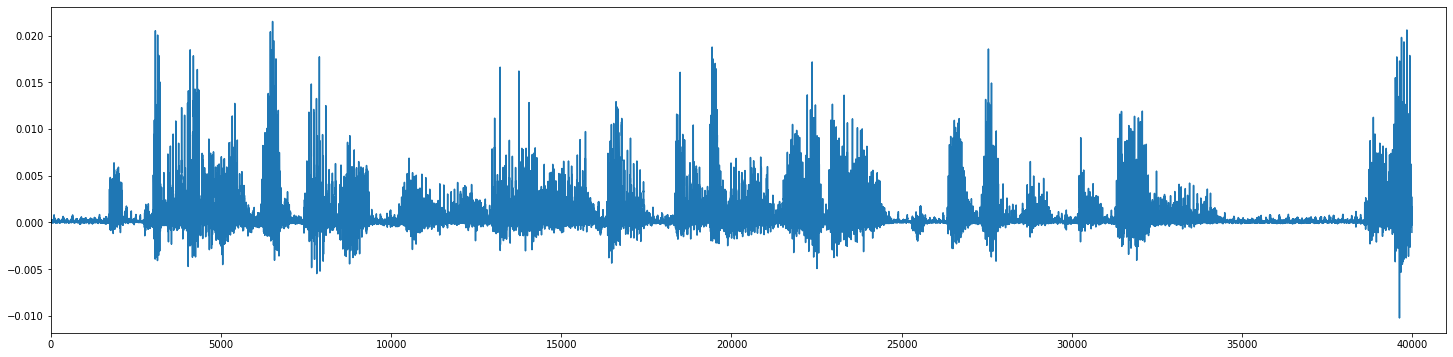

In [15]:
plt.figure(figsize=(25,6))
plt.xlim(0,41000)
plt.plot(x_2_audio[0][1].detach().numpy())
#
# plt.savefig("img/chunk0_single.jpg")


In [8]:
x_sep_out[0][0][0].shape

torch.Size([40002])

In [ ]:
plt.figure(figsize=(25,6))
plt.xlim(0,41000)
plt.plot(x_sep_out[1][1].detach().numpy())

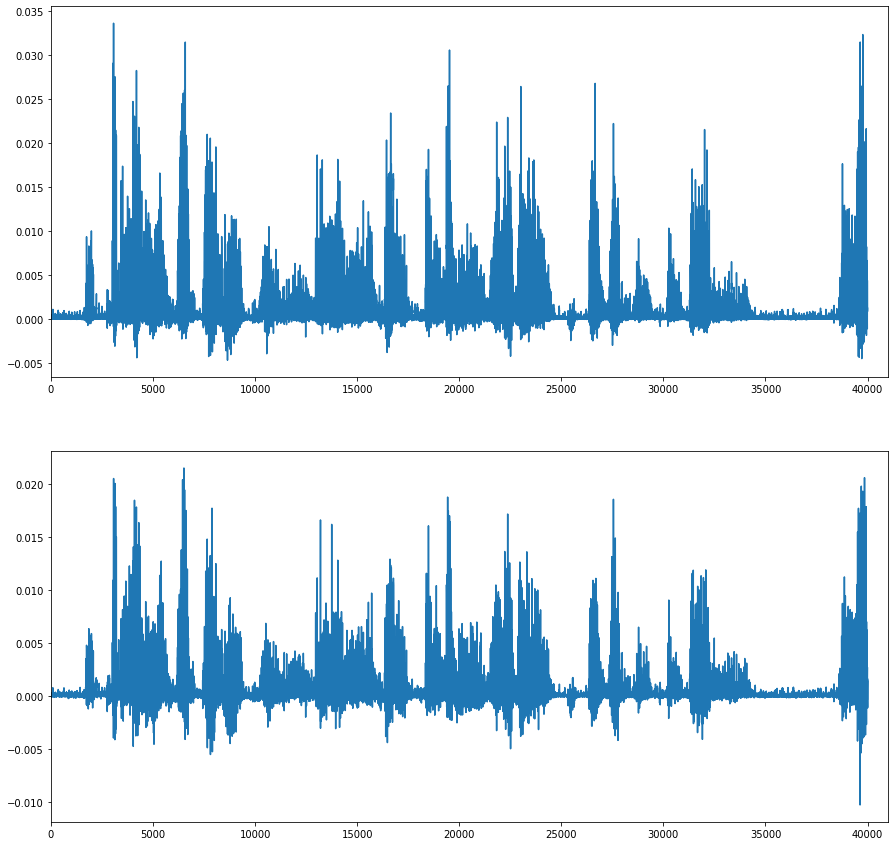

In [19]:
figure, axis = plt.subplots(2)
figure.set_figheight(15)
figure.set_figwidth(15)

for i in range(2):
    axis[i].set_xlim(0,41000)
    axis[i].plot(x_2_audio[0][i].detach().numpy())
figure.savefig("img/audioout.jpg")
# plt.plot(x_conv1d[0][0].detach().numpy())


In [14]:
import torch
from speechbrain.nnet.loss.si_snr_loss import si_snr_loss

# Create degraded and clean waveform tensors
y_pred_batch = torch.tensor([[0.5, 0.6, 0.7, 0.8], [0.1, 0.2, 0.3, 0.4]])
y_true_batch = torch.tensor([[0.5, 0.6, 0.7, 0.8], [0.1, 0.2, 0.3, 0.4]])
lens = torch.tensor([4, 4])

# Compute the loss
loss = si_snr_loss(y_pred_batch, y_true_batch, lens, reduction="mean")

# Print the loss
print(loss)

tensor(-155.1239)


In [16]:
AL.PITLossWrapper(AL.PairwiseNegSDR('sisdr'), pit_from='pw_mtx')

PITLossWrapper(
  (loss_func): PairwiseNegSDR()
)

In [15]:
A(y_pred_batch.unsqueeze(0),y_true_batch.unsqueeze(0))

tensor(-66.9897)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

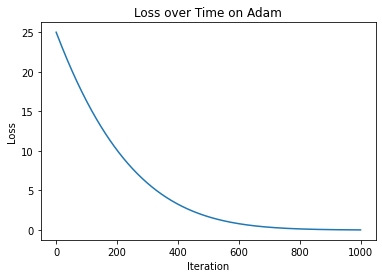

In [9]:


def func(x):
    return x**2

def grad(x):
    return 2*x

def loss(x):
    return func(x)

def adam_optimizer(x0, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m, v = 0, 0
    x = x0
    x_history = [x0]
    loss_history = [loss(x0)]
    for i in range(max_iter):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g**2)
        m_hat = m / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))
        x = x - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
        x_history.append(x)
        loss_history.append(loss(x))
    return x_history, loss_history

x0 = 5
x_history, loss_history = adam_optimizer(x0)

plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Time on Adam")
plt.show()